In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!wget -O cwk_data_20551522.zip "https://drive.google.com/uc?export=download&id=10_8RvtiYfM7opICfTaduEl3BtT_Uner5"
!unzip cwk_data_20551522.zip

--2024-01-04 18:01:37--  https://drive.google.com/uc?export=download&id=10_8RvtiYfM7opICfTaduEl3BtT_Uner5
Resolving drive.google.com (drive.google.com)... 142.251.2.100, 142.251.2.113, 142.251.2.102, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-2s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ie0162kfckfnck8f2ag5ud18vhvjmlqm/1704391275000/06347333818359791469/*/10_8RvtiYfM7opICfTaduEl3BtT_Uner5?e=download&uuid=1e26b768-4161-4b89-9346-8e66abf6dd49 [following]
--2024-01-04 18:01:37--  https://doc-08-2s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ie0162kfckfnck8f2ag5ud18vhvjmlqm/1704391275000/06347333818359791469/*/10_8RvtiYfM7opICfTaduEl3BtT_Uner5?e=download&uuid=1e26b768-4161-4b89-9346-8e66abf6dd49
Resolving doc-08-2s-docs.googleusercontent.com (doc-08-2s-docs.googleusercontent.com)... 142.250.141.132, 2607:f8b

In [ ]:
df = pd.read_csv('cwk_data_20551522.csv')

# 1. Summarisation

## 1.1 General statistics

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,y
0,47,blue-collar,married,primary,no,4157,no,no,unknown,11,90,3,-1,0,unknown,no
1,53,management,married,tertiary,no,2124,yes,no,cellular,17,121,2,344,2,failure,no
2,30,entrepreneur,married,secondary,no,31,no,no,unknown,8,229,1,-1,0,unknown,no
3,43,housemaid,married,secondary,no,743,no,yes,cellular,23,323,3,-1,0,unknown,no
4,53,technician,married,secondary,no,65,no,no,cellular,17,178,1,-1,0,unknown,no


First we check for null data in the dataset to perform initial data cleaning if necessary.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4000 non-null   int64 
 1   job        4000 non-null   object
 2   marital    4000 non-null   object
 3   education  4000 non-null   object
 4   default    4000 non-null   object
 5   balance    4000 non-null   int64 
 6   housing    4000 non-null   object
 7   loan       4000 non-null   object
 8   contact    4000 non-null   object
 9   day        4000 non-null   int64 
 10  duration   4000 non-null   int64 
 11  campaign   4000 non-null   int64 
 12  pdays      4000 non-null   int64 
 13  previous   4000 non-null   int64 
 14  poutcome   4000 non-null   object
 15  y          4000 non-null   object
dtypes: int64(7), object(9)
memory usage: 500.1+ KB


There is no null data. Next, we generate descriptive statistics of the dataset to get a general profile of the contacted customers. It can be seen that the average age of contacted customers were pretty high. Quite a lot of them were contacted before.

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,41.086500,1431.796250,15.642000,288.964750,2.718750,43.118500,0.648750
std,10.770679,2935.849718,8.267613,285.210796,3.051471,102.765097,2.080614
min,18.000000,-1884.000000,1.000000,5.000000,1.000000,-1.000000,0.000000
25%,33.000000,78.000000,8.000000,108.000000,1.000000,-1.000000,0.000000
50%,39.000000,478.000000,16.000000,193.500000,2.000000,-1.000000,0.000000
75%,49.000000,1545.500000,21.000000,358.000000,3.000000,-1.000000,0.000000
max,95.000000,42045.000000,31.000000,2516.000000,51.000000,831.000000,58.000000


The most common job among our potential customers is management. Most of them are married and and have had a secondary education.

In [ ]:
df.describe(include = 'object')

,job,marital,education,default,housing,loan,contact,poutcome,y
count,4000,4000,4000,4000,4000,4000,4000,4000,4000
unique,12,3,4,2,2,2,3,4,2
top,management,married,secondary,no,yes,no,cellular,unknown,no
freq,894,2408,1981,3925,2142,3411,2683,3210,3149


## 1.2 Target class distribution

It can be seen that the target variable is imbalanced, with the number of sucessful sales being much lower than the number of unsucessful calls. Such an asymmetry is common in the context of cold calls.

<Axes: >

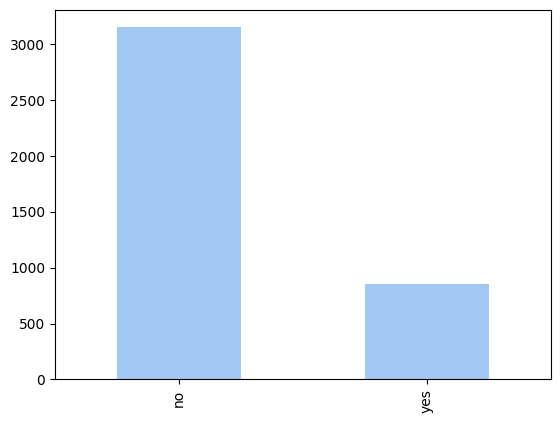

In [ ]:
sns.set_palette('pastel')
df['y'].value_counts().plot(kind='bar')

## 1.3 Correlation matrix

In [ ]:
df['y'].replace({'no': 0, 'yes': 1}, inplace=True);

<ipython-input-10-19d7063e70da>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


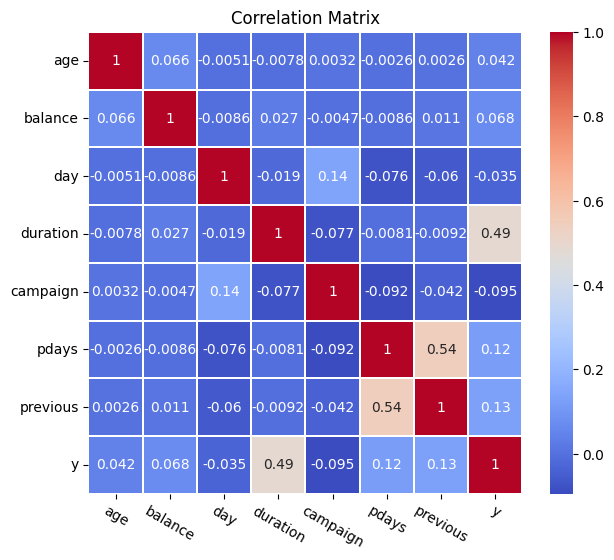

In [ ]:
corr = df.corr()
cor_plot = sns.heatmap(corr,annot=True,cmap='coolwarm',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(7,6)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

## 1.4 Target class distribution by different features

<Axes: xlabel='count', ylabel='age_group'>

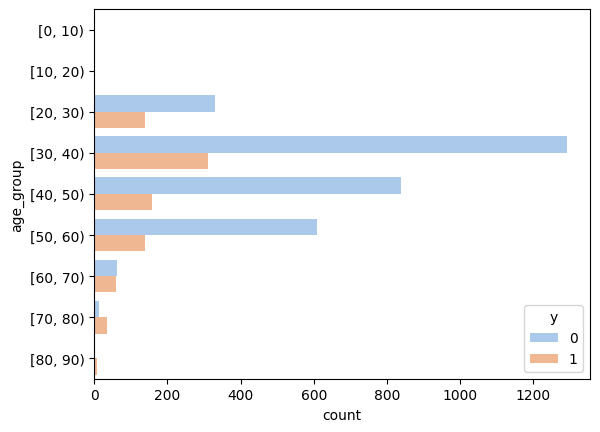

In [ ]:
# Target distribution by age
df['age_group'] = pd.cut(df['age'], range(0, 100, 10), right=False)
sns.countplot(data=df, y='age_group', hue='y')

Older people aged 60-80 and younger people seem to be more likely to buy the products.

<Axes: xlabel='count', ylabel='job'>

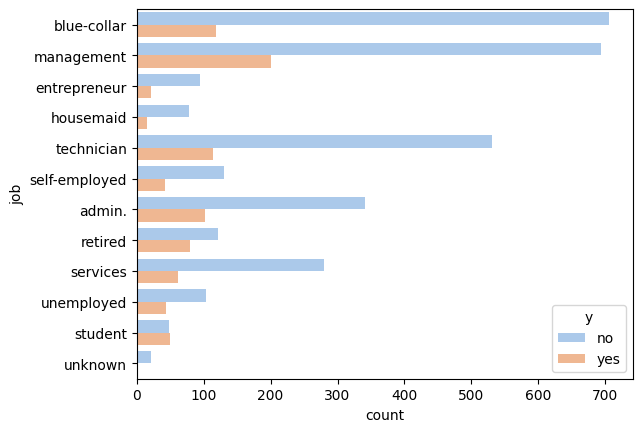

In [ ]:
# Target distribution by job
sns.countplot(data=df, y='job', hue='y')

 Students and retired people seem to be more likely to buy the products.

<Axes: xlabel='count', ylabel='marital'>

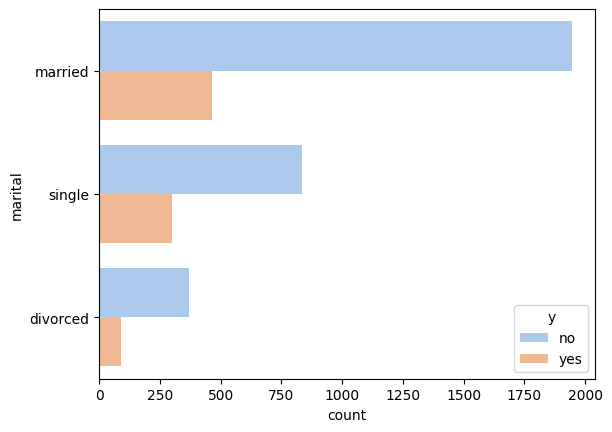

In [ ]:
# Target distribution by marital status
sns.countplot(data=df, y='marital', hue='y')

There is no substantial evidence of relationships between marital status and success outcomes.

<Axes: xlabel='count', ylabel='education'>

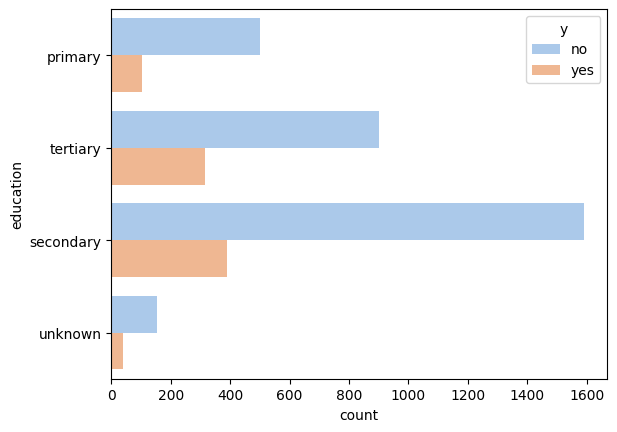

In [ ]:
# Target distribution by education
sns.countplot(data=df, y='education', hue='y')

There is no substantial evidence of relationships between education and success outcomes.

<Axes: xlabel='count', ylabel='default'>

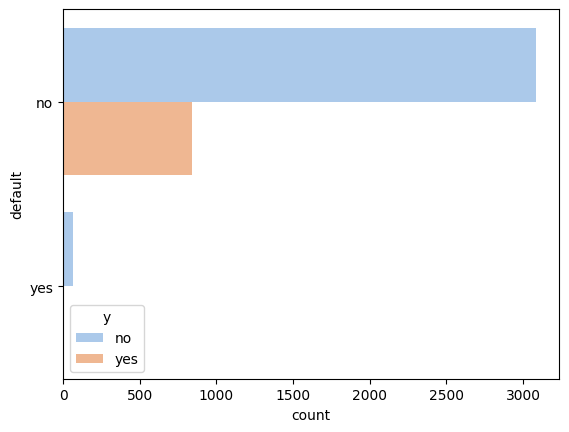

In [ ]:
# Target distribution by default
sns.countplot(data=df, y='default', hue='y')

It seems like people with credit in default are less likely to buy the products

<Axes: xlabel='count', ylabel='housing'>

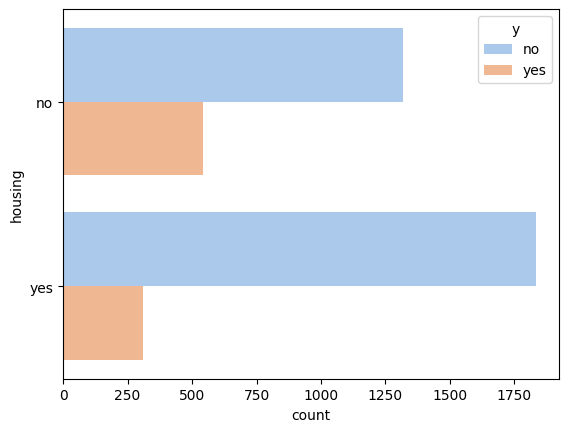

In [ ]:
# Target distribution by housing loan
sns.countplot(data=df, y='housing', hue='y')

There is no substantial evidence of relationships between housing and success outcome.

<Axes: xlabel='count', ylabel='loan'>

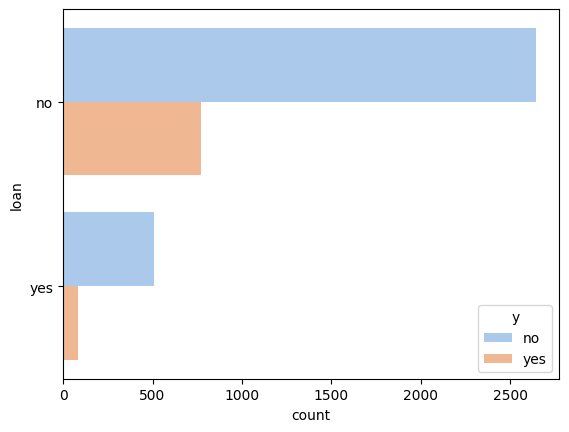

In [ ]:
# Target distribution by loan
sns.countplot(data=df, y='loan', hue='y')

There is no substantial evidence of relationships between loan and success outcomes.

<Axes: xlabel='count', ylabel='contact'>

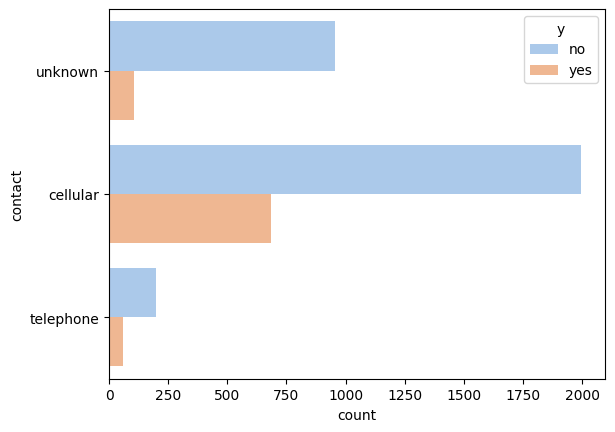

In [ ]:
# Target distribution by contact
sns.countplot(data=df, y='contact', hue='y')

<Axes: xlabel='count', ylabel='poutcome'>

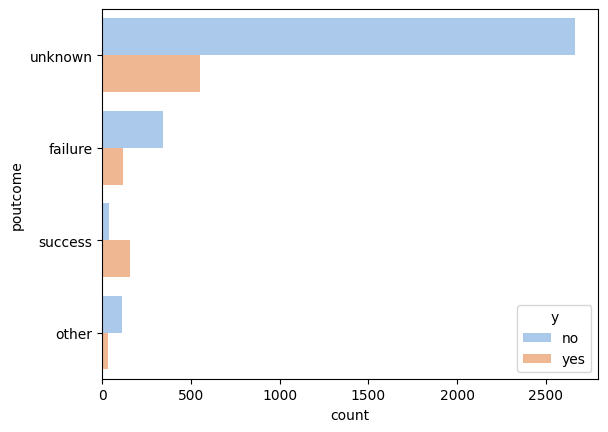

In [ ]:
# Target distribution by previous outcome
sns.countplot(data=df, y='poutcome', hue='y')

If the customer had a positive answer in a previous campaign, then the current one is more likely to be successful and vice versa. If he has never been contacted before (poutcome = unknown), the success rate is even lower.

# 2. Exploration

## 2.1 Data cleaning and encoding

We create a pivot table between 'job' and 'education' to assess whether 'job' is influenced by the 'education' of a person.

In [ ]:
pivot = df.pivot_table(index='job', columns='education', aggfunc='size', fill_value=0)
pivot

education,primary,secondary,tertiary,unknown
job,,,,
admin.,16,367,43,17
blue-collar,334,448,8,35
entrepreneur,14,46,49,7
housemaid,44,28,17,4
management,40,96,732,26
retired,60,86,39,17
self-employed,15,51,101,5
services,33,279,14,16
student,5,53,20,19


From the pivot table, it can be seen that people with management jobs usually have a tertiary education. Hence wherever 'job' = management and 'education' = unknown, we can replace 'education' with 'tertiary'. Similarly, 'job' = 'services' --> 'education' = 'secondary' and 'job' = 'admin' --> 'education' = 'secondary'.


In [ ]:
df.loc[(df['education']=='unknown') & (df['job']=='management'), 'education'] = 'tertiary'
df.loc[(df['education']=='unknown') & (df['job']=='admin'), 'education'] = 'secondary'
df.loc[(df['education']=='unknown') & (df['job']=='services'), 'education'] = 'secondary'
df.loc[(df['education']=='unknown') & (df['job']=='technician'), 'education'] = 'secondary'

There are no missing values in this dataset. However there are 'other' and 'unknown' values, which will be removed. The 'contact' feature will also be removed because it is not directly related to customers.

In [ ]:
df = df[df.job != 'unknown']
df = df[df.education != 'unknown']
df = df[df.poutcome != 'other']
df.drop(columns = 'contact')
df = df.reset_index()
df.head()

,index,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,y
0,0,47,blue-collar,married,primary,no,4157,no,no,unknown,11,90,3,-1,0,unknown,no
1,1,53,management,married,tertiary,no,2124,yes,no,cellular,17,121,2,344,2,failure,no
2,2,30,entrepreneur,married,secondary,no,31,no,no,unknown,8,229,1,-1,0,unknown,no
3,3,43,housemaid,married,secondary,no,743,no,yes,cellular,23,323,3,-1,0,unknown,no
4,4,53,technician,married,secondary,no,65,no,no,cellular,17,178,1,-1,0,unknown,no


All categorical variables are transformed into dummy variables using one-hot encoding. Dummy variables were used instead of continuous integers because these variables are not ordinal.

In [ ]:
df_encoded = pd.get_dummies(df)
column_to_move = 'y'
new_order = [col for col in df_encoded.columns if col != column_to_move] + [column_to_move]
df_encoded = df_encoded[new_order]
df_encoded.head()

,index,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_success,poutcome_unknown,y
0,0,47,4157,11,90,3,-1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,1,53,2124,17,121,2,344,2,0,0,...,1,1,0,1,0,0,1,0,0,0
2,2,30,31,8,229,1,-1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,3,43,743,23,323,3,-1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
4,4,53,65,17,178,1,-1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


## 2.2 Decision tree exploration

We apply 2 decision trees with different hyperparameters to examine influencing factors in the data.

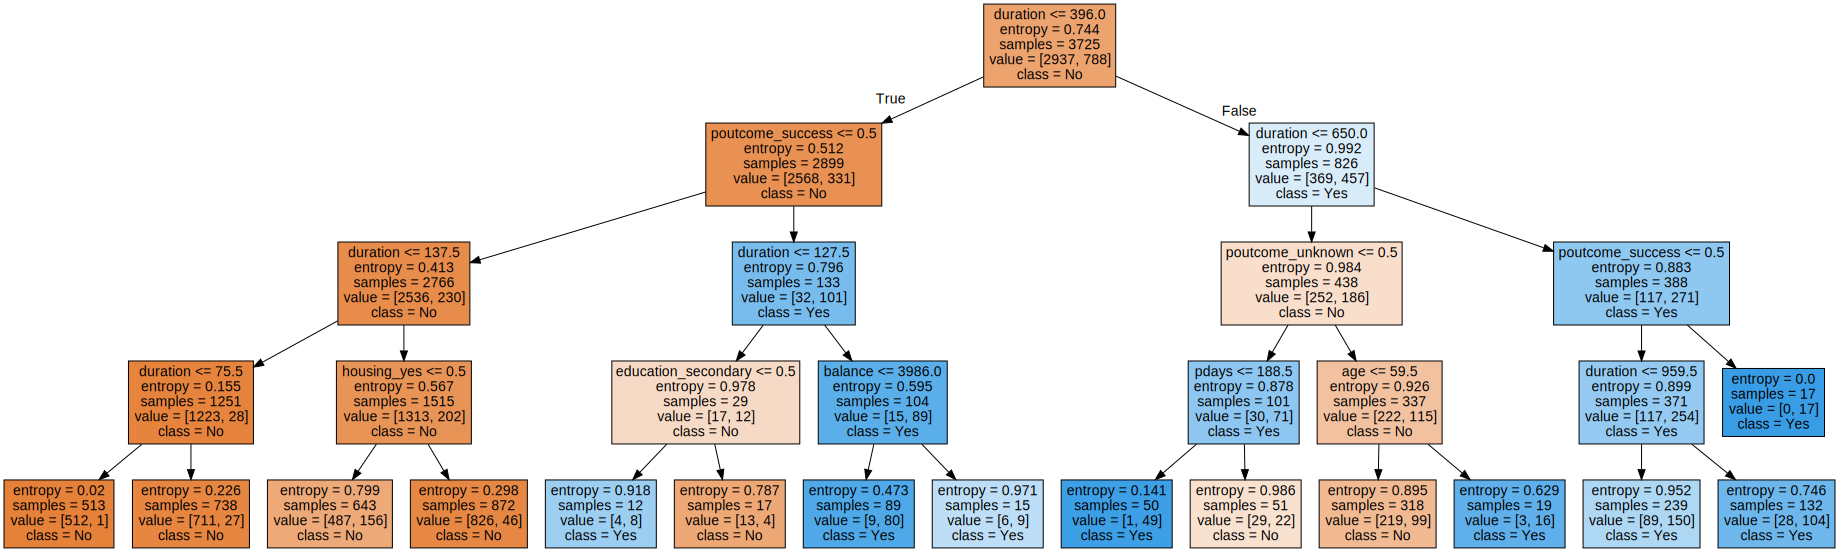

In [ ]:
X = df_encoded[df_encoded.columns[:-1]]
Y = df_encoded[df_encoded.columns[-1]]

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Decision tree 1
dt_1 = DecisionTreeClassifier(max_depth = 4, min_samples_leaf= 7, criterion = "entropy", random_state=42)
dt_1.fit(X, Y)

import graphviz
dot_data_1 = tree.export_graphviz(dt_1,
                                feature_names=X.columns,
                                class_names=['No', 'Yes'],
                                filled=True)

graph_1 = graphviz.Source(dot_data_1, format="png")
graph_1

In [ ]:
graph_1.render('dc1')

'dc1.png'

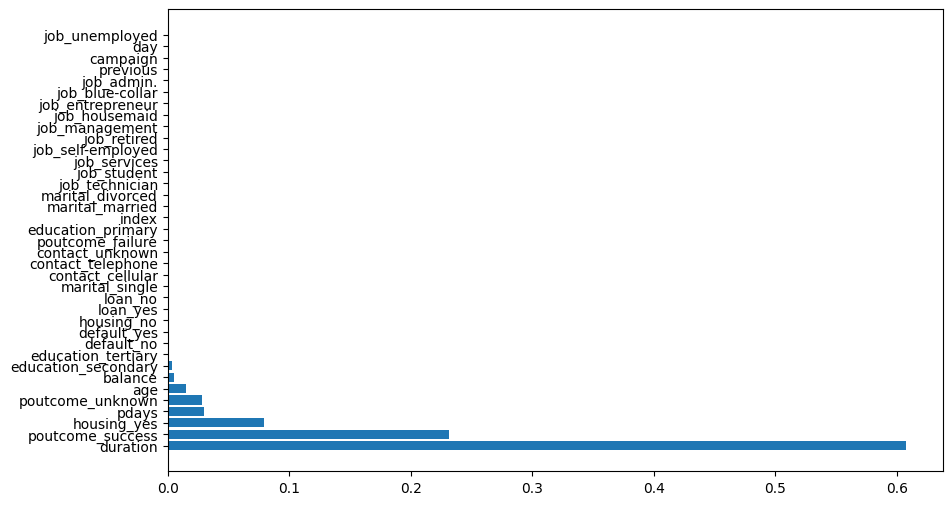

In [ ]:
# Feature importance 1
feature_importances_1 = dt_1.feature_importances_
feature_importances_1 = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_1})

# Sort the DataFrame by importance in descending order
feature_importances_1 = feature_importances_1.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_1['Feature'], feature_importances_1['Importance'])
plt.show()

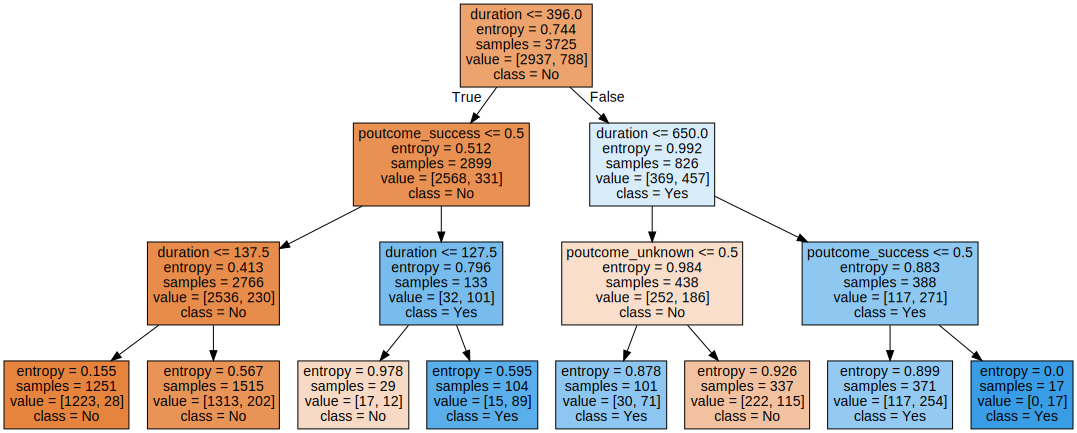

In [ ]:
# Decision tree 2
dt_2 = DecisionTreeClassifier(max_depth = 3, min_samples_leaf= 10, criterion = "entropy", random_state=42)
dt_2.fit(X, Y)

import graphviz
dot_data_2 = tree.export_graphviz(dt_2,
                                feature_names=X.columns,
                                class_names=['No', 'Yes'],
                                filled=True)

graph_2 = graphviz.Source(dot_data_2, format="png")
graph_2

In [ ]:
graph_2.render('dc2')

'dc2.png'

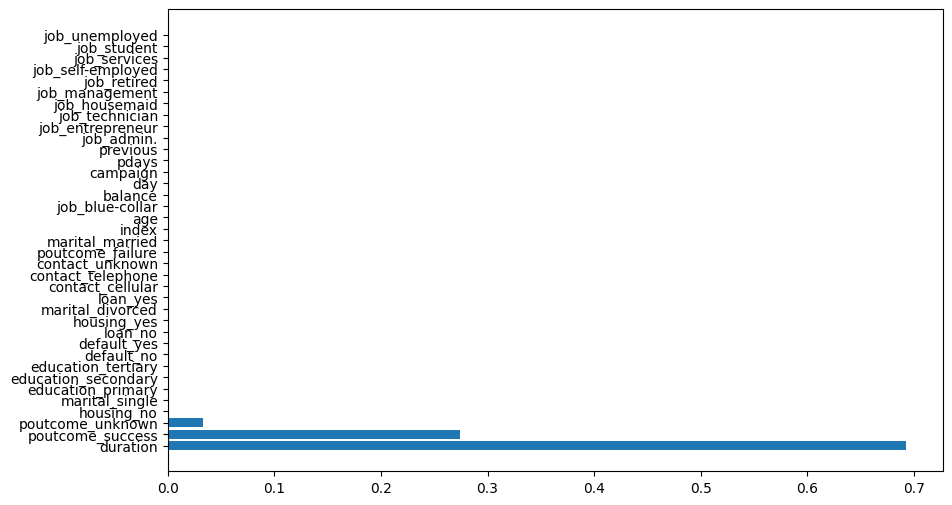

In [ ]:
# Feature importance 2
feature_importances_2 = dt_2.feature_importances_
feature_importances_2 = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_2})

# Sort the DataFrame by importance in descending order
feature_importances_2 = feature_importances_2.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_2['Feature'], feature_importances_2['Importance'])
plt.show()

# 3. Model evaluation

## 3.1 Establish Experimental Framework

In [ ]:
X = df_encoded[df_encoded.columns[:-1]]
Y = df_encoded[df_encoded.columns[-1]]

Because the dataset is imbalanced, stratified train-test split is chosen to ensure that the train and test sets have approximately the same percentage of samples of each target class as the complete set.

In [ ]:
from sklearn.model_selection import train_test_split

#-- setup our training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [ ]:
# Create a dummy classifier as a baseline
from sklearn import dummy
dc = dummy.DummyClassifier()
dc.fit(X_train, Y_train)

DummyClassifier()

In [ ]:
# Calculate performance score
from sklearn.metrics import precision_score, accuracy_score, recall_score, balanced_accuracy_score, confusion_matrix
y_pred = dc.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
accuracy = accuracy_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(Y_test, y_pred)

# Print the results
print(f"Precision: {precision:.3f}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Recall: {recall:.3f}")
print(f"Balanced Accuracy: {balanced_accuracy:.3f}")

Precision: 0.000
Accuracy: 0.788
Recall: 0.000
Balanced Accuracy: 0.500


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 100x100 with 0 Axes>

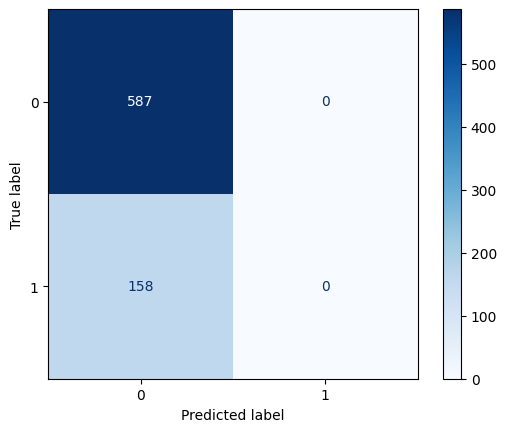

In [ ]:
# Draw confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matrix = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=['0','1'])
plt.figure(figsize=(1,1))
disp.plot(cmap=plt.cm.Blues)
plt.show()

## 3.2 Create models

### 3.2.1 Logistic Regression

In [ ]:
# Define the model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=7000, random_state=42)

# Define the parameters
paras = {
    'penalty': ['l2', None],
    'C': [100, 10, 1.0, 0.1, 0.01],
}

# Grid search with cross validation
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=lr,
                           param_grid=paras,
                           cv=5,
                           scoring = "precision")
grid_search.fit(X_train, Y_train)

# Select the best model based on cross validation score
best_lr = grid_search.best_estimator_
best_lr.fit(X_train, Y_train)

# Evaluate model on the hold out dataset
y_pred = best_lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and

In [ ]:
# Compute the performance score
precision = precision_score(Y_test, y_pred)
accuracy = accuracy_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(Y_test, y_pred)

# Print the results
print(f"Precision: {precision:.3f}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Recall: {recall:.3f}")
print(f"Balanced Accuracy: {balanced_accuracy:.3f}")

Precision: 0.695
Accuracy: 0.843
Recall: 0.462
Balanced Accuracy: 0.704


<Figure size 100x100 with 0 Axes>

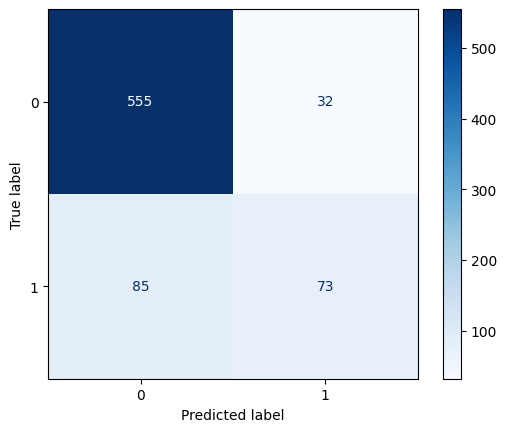

In [ ]:
# Draw confusion matrix
matrix = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=['0','1'])
plt.figure(figsize=(1,1))
disp.plot(cmap=plt.cm.Blues)
plt.show()

### 3.2.2 Decision tree

In [ ]:
# Define the model
dt = tree.DecisionTreeClassifier(random_state = 42)

# Define the parameters
paras = {
    'max_depth': range(1,40,2),
    'min_samples_leaf': range(1,200,10),
    'criterion': ["gini", "entropy"]
}

# Grid search with cross validation
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=dt,
                           param_grid=paras,
                           cv=5,
                           scoring = "precision")
grid_search.fit(X_train, Y_train)

# Select the best model based on cross validation score
best_dc = grid_search.best_estimator_
best_dc.fit(X_train, Y_train)

# Evaluate model on the hold out dataset
y_pred = best_dc.predict(X_test)

In [ ]:
# Compute the performance score
from sklearn.metrics import precision_score, accuracy_score, recall_score, balanced_accuracy_score, confusion_matrix
precision = precision_score(Y_test, y_pred)
accuracy = accuracy_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(Y_test, y_pred)

# Print the results
print(f"Precision: {precision:.3f}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Recall: {recall:.3f}")
print(f"Balanced Accuracy: {balanced_accuracy:.3f}")

Precision: 0.695
Accuracy: 0.838
Recall: 0.418
Balanced Accuracy: 0.684


<Figure size 100x100 with 0 Axes>

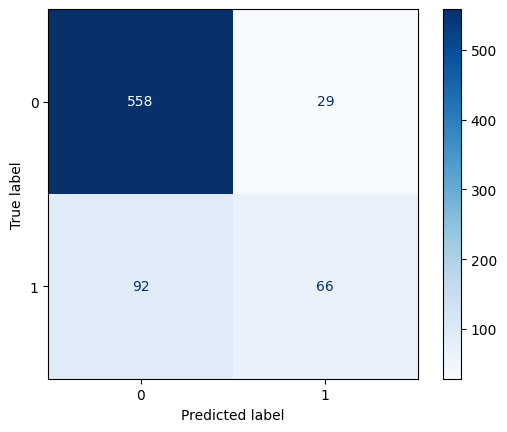

In [ ]:
# Draw confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matrix = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=['0','1'])
plt.figure(figsize=(1,1))
disp.plot(cmap=plt.cm.Blues)
plt.show()

###3.2.3 Random forest

In [ ]:
# Define the model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)

# Define the parameters
paras = {
    'n_estimators': [30, 100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 6, 10],
    'min_samples_split': [5, 10, 15, 20, 30],
    'min_samples_leaf': [3, 6, 10, 15, 20, 30]
}

# Grid search with cross validation
grid_search = GridSearchCV(estimator=rf,
                           param_grid=paras,
                           cv=4,
                           scoring = "precision")
grid_search.fit(X_train, Y_train)

# Select the best model based on cross validation score
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, Y_train)

# Evaluate model on the hold out dataset
y_pred = best_rf.predict(X_test)

In [ ]:
# Compute the performance score
precision = precision_score(Y_test, y_pred)
accuracy = accuracy_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(Y_test, y_pred)

# Print the results
print(f"Precision: {precision:.3f}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Recall: {recall:.3f}")
print(f"Balanced Accuracy: {balanced_accuracy:.3f}")

Precision: 0.793
Accuracy: 0.811
Recall: 0.146
Balanced Accuracy: 0.568


<Figure size 100x100 with 0 Axes>

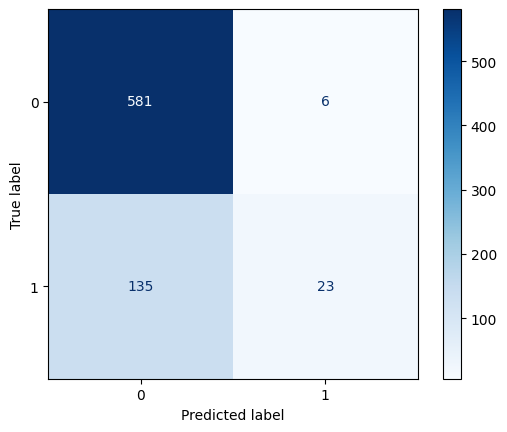

In [ ]:
# Draw confusion matrix
matrix = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=['0','1'])
plt.figure(figsize=(1,1))
disp.plot(cmap=plt.cm.Blues)
plt.show()

# 4. Model implementation

In [ ]:
# Fit the best performing model to the whole dataset
best_rf.fit(X,Y)

RandomForestClassifier(criterion='entropy', max_depth=3, min_samples_leaf=20,
                       min_samples_split=5, n_estimators=500, random_state=42)